###Introduction


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Cookbook<a/>.

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd

## Object Creation


See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro">Intro to data structures section</a>.

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.115305,0.529127,-0.003314,0.688294
2013-01-02,-0.983353,1.020859,-1.435412,-1.962585
2013-01-03,1.593179,-0.887334,1.445442,0.583037
2013-01-04,1.283861,1.409999,-0.243492,-0.924672
2013-01-05,-2.927385,-0.621422,-0.072663,-1.484252
2013-01-06,0.577751,-0.055832,-2.146248,0.509792


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a dictionary of objects that can be converted into a series-like structure:

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [6]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

If you’re using an interactive tool with automatic completion for column names, here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



## Viewing data

See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics">Basics section</a>.

Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.115305,0.529127,-0.003314,0.688294
2013-01-02,-0.983353,1.020859,-1.435412,-1.962585
2013-01-03,1.593179,-0.887334,1.445442,0.583037
2013-01-04,1.283861,1.409999,-0.243492,-0.924672
2013-01-05,-2.927385,-0.621422,-0.072663,-1.484252


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,1.283861,1.409999,-0.243492,-0.924672
2013-01-05,-2.927385,-0.621422,-0.072663,-1.484252
2013-01-06,0.577751,-0.055832,-2.146248,0.509792


Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> of all floating-point values, and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is fast and doesn’t require copying data:

In [11]:
df.to_numpy()

array([[ 0.11530506,  0.52912736, -0.0033141 ,  0.68829389],
       [-0.98335265,  1.02085875, -1.43541245, -1.96258515],
       [ 1.59317949, -0.88733427,  1.4454425 ,  0.58303688],
       [ 1.2838609 ,  1.4099988 , -0.24349216, -0.92467246],
       [-2.9273851 , -0.62142227, -0.0726632 , -1.48425215],
       [ 0.57775141, -0.0558319 , -2.14624759,  0.5097917 ]])

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

NOTE: <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> does not include the index or column labels in the output.

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.056773,0.232566,-0.409281,-0.431731
std,1.676355,0.912398,1.250248,1.171749
min,-2.927385,-0.887334,-2.146248,-1.962585
25%,-0.708688,-0.480025,-1.137432,-1.344357
50%,0.346528,0.236648,-0.158078,-0.207440
75%,1.107334,0.897926,-0.020651,0.564726
max,1.593179,1.409999,1.445442,0.688294


Transposing your data:

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.115305,-0.983353,1.593179,1.283861,-2.927385,0.577751
B,0.529127,1.020859,-0.887334,1.409999,-0.621422,-0.055832
C,-0.003314,-1.435412,1.445442,-0.243492,-0.072663,-2.146248
D,0.688294,-1.962585,0.583037,-0.924672,-1.484252,0.509792


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.688294,-0.003314,0.529127,0.115305
2013-01-02,-1.962585,-1.435412,1.020859,-0.983353
2013-01-03,0.583037,1.445442,-0.887334,1.593179
2013-01-04,-0.924672,-0.243492,1.409999,1.283861
2013-01-05,-1.484252,-0.072663,-0.621422,-2.927385
2013-01-06,0.509792,-2.146248,-0.055832,0.577751


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,1.593179,-0.887334,1.445442,0.583037
2013-01-05,-2.927385,-0.621422,-0.072663,-1.484252
2013-01-06,0.577751,-0.055832,-2.146248,0.509792
2013-01-01,0.115305,0.529127,-0.003314,0.688294
2013-01-02,-0.983353,1.020859,-1.435412,-1.962585
2013-01-04,1.283861,1.409999,-0.243492,-0.924672


#### 👉 Save your work here




## Selection

NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.

See the indexing documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a>.



### Getting

Selecting a single column, which yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>, equivalent to `df.A`:

In [17]:
df["A"]

2013-01-01    0.115305
2013-01-02   -0.983353
2013-01-03    1.593179
2013-01-04    1.283861
2013-01-05   -2.927385
2013-01-06    0.577751
Freq: D, Name: A, dtype: float64

Selecting via `[]` (`__getitem__`), which slices the rows:

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,0.115305,0.529127,-0.003314,0.688294
2013-01-02,-0.983353,1.020859,-1.435412,-1.962585
2013-01-03,1.593179,-0.887334,1.445442,0.583037


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.983353,1.020859,-1.435412,-1.962585
2013-01-03,1.593179,-0.887334,1.445442,0.583037
2013-01-04,1.283861,1.409999,-0.243492,-0.924672


### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

For getting a cross section using a label:

In [20]:
df.loc[dates[0]]

A    0.115305
B    0.529127
C   -0.003314
D    0.688294
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.115305,0.529127
2013-01-02,-0.983353,1.020859
2013-01-03,1.593179,-0.887334
2013-01-04,1.283861,1.409999
2013-01-05,-2.927385,-0.621422
2013-01-06,0.577751,-0.055832


Showing label slicing, both endpoints are included:

In [22]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.983353,1.020859
2013-01-03,1.593179,-0.887334
2013-01-04,1.283861,1.409999


Reduction in the dimensions of the returned object:

In [23]:
df.loc["20130102", ["A", "B"]]

A   -0.983353
B    1.020859
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [24]:
df.loc[dates[0], "A"]

0.11530506357235329

For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], "A"]

0.11530506357235329

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [26]:
df.iloc[3]

A    1.283861
B    1.409999
C   -0.243492
D   -0.924672
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.283861,1.409999
2013-01-05,-2.927385,-0.621422


By lists of integer position locations, similar to the NumPy/Python style:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.983353,-1.435412
2013-01-03,1.593179,1.445442
2013-01-05,-2.927385,-0.072663


For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.983353,1.020859,-1.435412,-1.962585
2013-01-03,1.593179,-0.887334,1.445442,0.583037


For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.529127,-0.003314
2013-01-02,1.020859,-1.435412
2013-01-03,-0.887334,1.445442
2013-01-04,1.409999,-0.243492
2013-01-05,-0.621422,-0.072663
2013-01-06,-0.055832,-2.146248


For getting a value explicitly:

In [31]:
df.iloc[1, 1]

1.0208587474147905

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

1.0208587474147905

### Boolean indexing

Using a single column’s values to select data:

In [33]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.115305,0.529127,-0.003314,0.688294
2013-01-03,1.593179,-0.887334,1.445442,0.583037
2013-01-04,1.283861,1.409999,-0.243492,-0.924672
2013-01-06,0.577751,-0.055832,-2.146248,0.509792


Selecting values from a DataFrame where a boolean condition is met:

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,0.115305,0.529127,NaN,0.688294
2013-01-02,NaN,1.020859,NaN,NaN
2013-01-03,1.593179,NaN,1.445442,0.583037
2013-01-04,1.283861,1.409999,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.577751,NaN,NaN,0.509792


Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.115305,0.529127,-0.003314,0.688294,one
2013-01-02,-0.983353,1.020859,-1.435412,-1.962585,one
2013-01-03,1.593179,-0.887334,1.445442,0.583037,two
2013-01-04,1.283861,1.409999,-0.243492,-0.924672,three
2013-01-05,-2.927385,-0.621422,-0.072663,-1.484252,four
2013-01-06,0.577751,-0.055832,-2.146248,0.509792,three


In [36]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.593179,-0.887334,1.445442,0.583037,two
2013-01-05,-2.927385,-0.621422,-0.072663,-1.484252,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1

Setting values by label:

In [39]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [ ]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [40]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [41]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.529127,-0.003314,5.0,NaN
2013-01-02,-0.983353,1.020859,-1.435412,5.0,1.0
2013-01-03,1.593179,-0.887334,1.445442,5.0,2.0
2013-01-04,1.283861,1.409999,-0.243492,5.0,3.0
2013-01-05,-2.927385,-0.621422,-0.072663,5.0,4.0
2013-01-06,0.577751,-0.055832,-2.146248,5.0,5.0


A `where` operation with setting:

In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-0.529127,-0.003314,-5.0,NaN
2013-01-02,-0.983353,-1.020859,-1.435412,-5.0,-1.0
2013-01-03,-1.593179,-0.887334,-1.445442,-5.0,-2.0
2013-01-04,-1.283861,-1.409999,-0.243492,-5.0,-3.0
2013-01-05,-2.927385,-0.621422,-0.072663,-5.0,-4.0
2013-01-06,-0.577751,-0.055832,-2.146248,-5.0,-5.0


#### 👉 Save your work here




## Missing data

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [43]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.529127,-0.003314,5.0,NaN,1.0
2013-01-02,-0.983353,1.020859,-1.435412,5.0,1.0,1.0
2013-01-03,1.593179,-0.887334,1.445442,5.0,2.0,NaN
2013-01-04,1.283861,1.409999,-0.243492,5.0,3.0,NaN


[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [44]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.983353,1.020859,-1.435412,5.0,1.0,1.0


[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.529127,-0.003314,5.0,5.0,1.0
2013-01-02,-0.983353,1.020859,-1.435412,5.0,1.0,1.0
2013-01-03,1.593179,-0.887334,1.445442,5.0,2.0,5.0
2013-01-04,1.283861,1.409999,-0.243492,5.0,3.0,5.0


[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [46]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:


In [47]:
df.mean()

A   -0.075991
B    0.232566
C   -0.409281
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [48]:
df.mean(1)

2013-01-01    1.381453
2013-01-02    0.920419
2013-01-03    1.830258
2013-01-04    2.090074
2013-01-05    1.075706
2013-01-06    1.675134
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically
broadcasts along the specified dimension

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.593179,-1.887334,0.445442,4.0,1.0
2013-01-04,-1.716139,-1.590001,-3.243492,2.0,0.0
2013-01-05,-7.927385,-5.621422,-5.072663,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

[`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) applies a user defined function to the data:

In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.529127,-0.003314,5.0,NaN
2013-01-02,-0.983353,1.549986,-1.438727,10.0,1.0
2013-01-03,0.609827,0.662652,0.006716,15.0,3.0
2013-01-04,1.893688,2.072651,-0.236776,20.0,6.0
2013-01-05,-1.033697,1.451228,-0.309439,25.0,10.0
2013-01-06,-0.455946,1.395396,-2.455687,30.0,15.0


In [52]:
df.apply(lambda x: x.max() - x.min())

A    4.520565
B    2.297333
C    3.591690
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    1
2    6
3    1
4    5
5    2
6    6
7    6
8    6
9    6
dtype: int64

In [54]:
s.value_counts()

6    5
1    2
3    1
5    1
2    1
Name: count, dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [55]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### 👉 Save your work here




## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [56]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.350017,0.000216,0.505556,1.044748
1,-0.479199,1.093774,-0.151633,-0.277127
2,-0.926694,0.176375,-0.614703,-0.639622
3,-2.137441,-0.297635,0.856554,0.441599
4,-1.000884,-0.499478,-0.402143,-0.135552
5,-0.613744,0.408111,-0.809830,-0.392957
6,1.927679,-0.179203,0.643840,-2.134554
7,1.000008,0.665305,-0.745076,0.582511
8,0.812194,0.284089,-1.649944,-0.037245
9,0.371528,0.126053,0.178011,-1.846091


In [57]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,-0.350017,0.000216,0.505556,1.044748
1,-0.479199,1.093774,-0.151633,-0.277127
2,-0.926694,0.176375,-0.614703,-0.639622
3,-2.137441,-0.297635,0.856554,0.441599
4,-1.000884,-0.499478,-0.402143,-0.135552
5,-0.613744,0.408111,-0.809830,-0.392957
6,1.927679,-0.179203,0.643840,-2.134554
7,1.000008,0.665305,-0.745076,0.582511
8,0.812194,0.284089,-1.649944,-0.037245
9,0.371528,0.126053,0.178011,-1.846091


NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [58]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

Another example that can be given is:

In [59]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


#### 👉 Save your work here




## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [60]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.260440,-0.549759
1,bar,one,-0.726441,-1.102573
2,foo,two,-0.321851,0.049776
3,bar,three,-0.002251,-0.169081
4,foo,two,-0.010561,0.941038
5,bar,two,-0.549811,-0.015419
6,foo,one,2.181416,0.904016
7,bar,three,0.065410,-0.000011


Grouping and then applying the `sum()` funcion to the resulting group:

In [61]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-1.213093,-1.287084
foo,2.109445,1.345071


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function:

In [62]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.726441 -1.102573
    three  0.063159 -0.169092
    two   -0.549811 -0.015419
foo one    2.441857  0.354257
    two   -0.332412  0.990814

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [63]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.776216 -0.185994
      two     1.185060  0.077514
baz   one     2.048085 -0.165956
      two    -1.433729  1.469719

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [64]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.776216
               B   -0.185994
       two     A    1.185060
               B    0.077514
baz    one     A    2.048085
               B   -0.165956
       two     A   -1.433729
               B    1.469719
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [65]:
stacked.unstack()

A         B
first second                    
bar   one     0.776216 -0.185994
      two     1.185060  0.077514
baz   one     2.048085 -0.165956
      two    -1.433729  1.469719

In [66]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.776216  1.185060
      B -0.185994  0.077514
baz   A  2.048085 -1.433729
      B -0.165956  1.469719

In [67]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.776216  2.048085
       B -0.185994 -0.165956
two    A  1.185060 -1.433729
       B  0.077514  1.469719

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [68]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-1.754976,1.173816
1,one,B,foo,-0.590864,0.745456
2,two,C,foo,-0.401576,0.678477
3,three,A,bar,-1.801981,-0.376781
4,one,B,bar,-0.470820,0.250762
5,one,C,bar,-0.721448,1.080188
6,two,A,foo,2.865736,-0.387752
7,three,B,foo,0.382284,0.599651
8,one,C,foo,-0.308107,-0.971824
9,one,A,bar,1.539664,-0.749266


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [69]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.539664 -1.754976
      B -0.470820 -0.590864
      C -0.721448 -0.308107
three A -1.801981       NaN
      B       NaN  0.382284
      C  1.222564       NaN
two   A       NaN  2.865736
      B -0.379118       NaN
      C       NaN -0.401576

#### 👉 Save your work here




## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [76]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    23655
Freq: 5min, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [81]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06    1.492935
2012-03-07   -2.095056
2012-03-08   -0.357822
2012-03-09    0.046166
2012-03-10   -0.669510
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00    1.492935
2012-03-07 00:00:00+00:00   -2.095056
2012-03-08 00:00:00+00:00   -0.357822
2012-03-09 00:00:00+00:00    0.046166
2012-03-10 00:00:00+00:00   -0.669510
Freq: D, dtype: float64

Converting between time span representations:

In [83]:
rng = pd.date_range("1/1/2012", periods=5, freq="ME")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

2012-01    0.751157
2012-02    0.640642
2012-03   -1.487173
2012-04    1.155393
2012-05   -0.892822
Freq: M, dtype: float64

In [84]:
ps.to_timestamp()

2012-01-01    0.751157
2012-02-01    0.640642
2012-03-01   -1.487173
2012-04-01    1.155393
2012-05-01   -0.892822
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [88]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("h", "s") + 9
ts.head()

1990-03-01 09:00   -1.073411
1990-06-01 09:00    0.035306
1990-09-01 09:00    0.455644
1990-12-01 09:00    0.234517
1991-03-01 09:00    0.331631
Freq: h, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [89]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [92]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [93]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [94]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [95]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [96]:
df.groupby("grade").size()

/tmp/ipykernel_52267/3951628473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

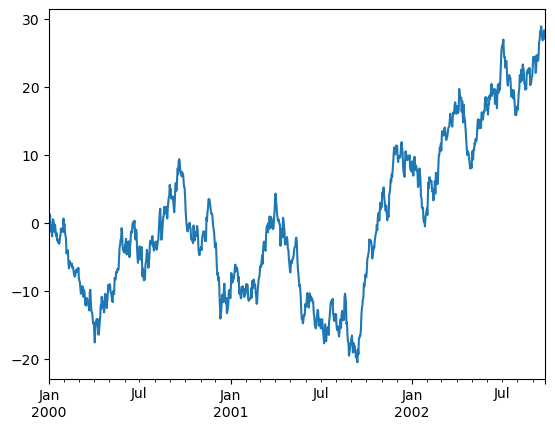

In [97]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

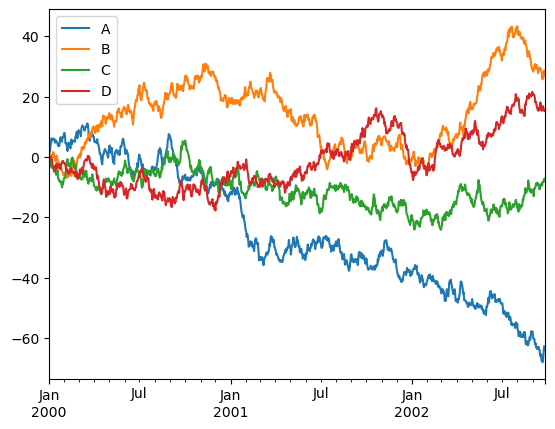

In [98]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

#### 👉 Save your work here




## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [99]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [100]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.750727,0.986509,-1.166004,0.493853
1,2000-01-02,1.841576,0.343013,-0.873336,0.133494
2,2000-01-03,1.951761,0.791362,-1.228386,-0.108525
3,2000-01-04,4.110938,0.245142,-1.298585,-0.244870
4,2000-01-05,4.893393,-1.130628,-3.268528,-0.053821
...,...,...,...,...,...
995,2002-09-22,-66.957364,27.145640,-8.159405,16.818653
996,2002-09-23,-64.889671,27.986315,-8.278749,15.453404
997,2002-09-24,-62.792630,28.705248,-7.399369,15.287342
998,2002-09-25,-63.287534,27.699205,-7.126713,15.713324


### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [101]:
df.to_hdf("foo.h5", "df")

/tmp/ipykernel_52267/992960660.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf("foo.h5", "df")


Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [102]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.750727,0.986509,-1.166004,0.493853
2000-01-02,1.841576,0.343013,-0.873336,0.133494
2000-01-03,1.951761,0.791362,-1.228386,-0.108525
2000-01-04,4.110938,0.245142,-1.298585,-0.244870
2000-01-05,4.893393,-1.130628,-3.268528,-0.053821
...,...,...,...,...
2002-09-22,-66.957364,27.145640,-8.159405,16.818653
2002-09-23,-64.889671,27.986315,-8.278749,15.453404
2002-09-24,-62.792630,28.705248,-7.399369,15.287342
2002-09-25,-63.287534,27.699205,-7.126713,15.713324


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [103]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [104]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.750727,0.986509,-1.166004,0.493853
1,2000-01-02,1.841576,0.343013,-0.873336,0.133494
2,2000-01-03,1.951761,0.791362,-1.228386,-0.108525
3,2000-01-04,4.110938,0.245142,-1.298585,-0.244870
4,2000-01-05,4.893393,-1.130628,-3.268528,-0.053821
...,...,...,...,...,...
995,2002-09-22,-66.957364,27.145640,-8.159405,16.818653
996,2002-09-23,-64.889671,27.986315,-8.278749,15.453404
997,2002-09-24,-62.792630,28.705248,-7.399369,15.287342
998,2002-09-25,-63.287534,27.699205,-7.126713,15.713324


## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [105]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.

#### 👉 Save your work here


